<a href="https://colab.research.google.com/github/Sashka1101/TFG_Gender_Bias/blob/main/CasoMujeresPreProcesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install pandas

In [9]:
pip install nltk

In [10]:
pip install gensim

In [11]:
pip install wordcloud

In [2]:
pip install matplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.1 MB/s eta 0:00:00
  Created wheel for SimpleWebSocketServer: filename=SimpleWebSocketServer-0.1.2-py3-none-any.whl size=9664 sha256=b8f861cfa2a4179336b92ba5dadd16ee001a9d715d09a57ab43b18164e8d0b78
  Stored in directory: /root/.cache/pip/wheels/af/cb/9d/23ef01c9c26b978be6d29ed456d7348abd0e96b1563049bd63
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=f14a6b84940392395444626002c9683173e69e5821cff7841e3b849d8cae5d93
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
  Created whe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.9 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.84.0
    Uninstalling google-api-python-client-2.84.0:
ERROR: Operation cancelled by user


Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/util

In [19]:
pip install Word2Vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for Word2Vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=141242 sha256=cc133d719417be88ca019e55b2061ba3f7e66141051cbf72baab709d21136295
  Stored in directory: /root/.cache/pip/wheels/6a/fa/d1/e03e8c10e0e2aa5c7b6e2b46b4a1c715d140283853937bb4b1
Successfully built Word2Vec


In [6]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 10.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=a6191916e0d31b4d8e183b29a791563854c9b7c00d7d02d59da8d4526bf2fd16
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: rfc3986
    Found existing installation: rfc3986 2.0.0
    Uninstalling

In [16]:
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import multiprocessing
import nltk
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from deep_translator import LingueeTranslator
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import googletrans
from googletrans import Translator
import csv
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['university', 'research', 'spanish', 'work', 'scientific', 'professor', 'science', 'study', 'institute', 'since', 'award', 'year', 'researcher', 'also', 'department', 'woman', 'director', 'thesis', 'publication', 'national', 'first', 'doctoral', 'society', 'council', 'international', 'member', 'group', 'center', 'degree', 'madrid', 'field', 'development', 'president', 'vice', 'scientist', 'project', 'obtained', 'association', 'doctor', 'doctorate', 'graduated', 'spain', 'biology', 'career', 'magazine', 'new', 'higher', 'various', 'prize', 'published', 'one', 'csic', 'part', 'two', 'faculty', 'academic', 'state', 'received', 'academy', 'technology', 'school', 'area', 'royal', 'began', 'dedicated', 'book', 'recognized', 'article', 'position', 'specialized', 'recognition', 'life', 'board', 'directed', 'foundation', 'worked', 'participated', 'teaching', 'european', 'role', 'professional', 'among', 'molecular', 'system', 'world', 'activity', 'scholarship', 'currently', 'medicine', 'united'

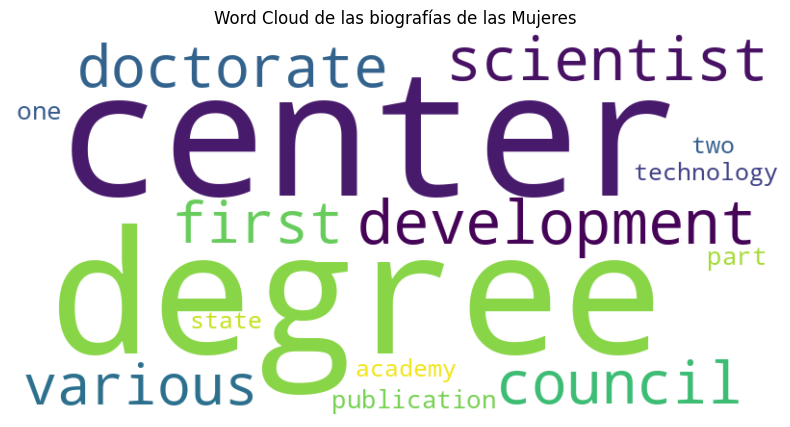

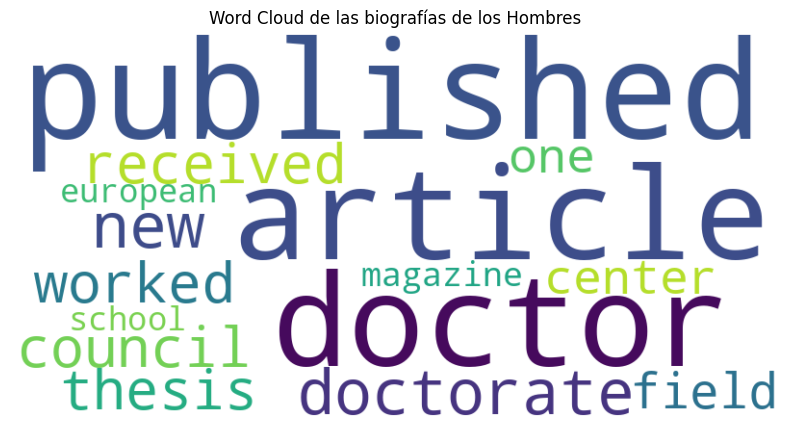

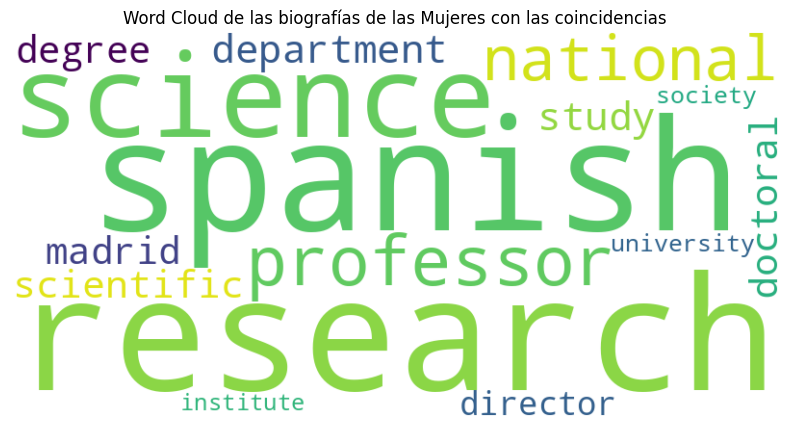

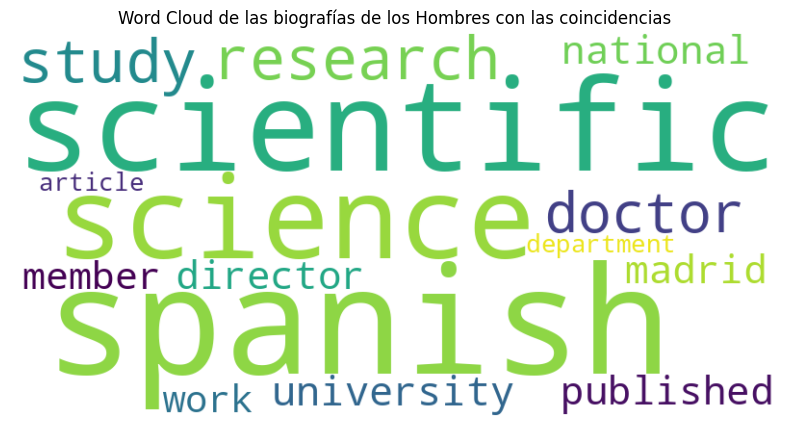

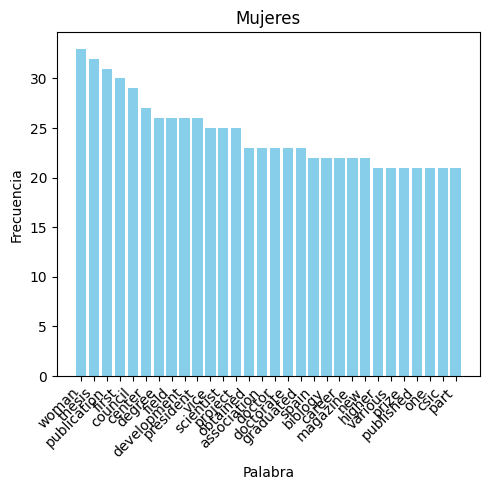

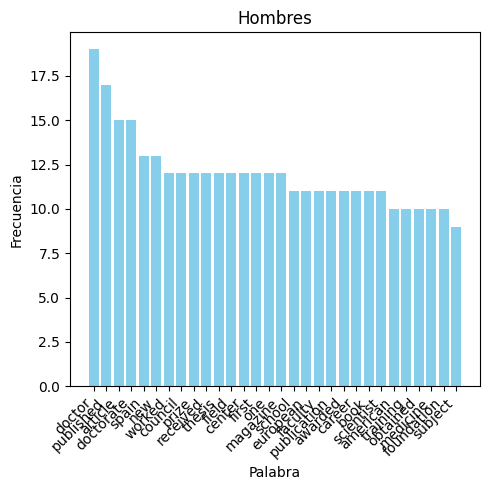

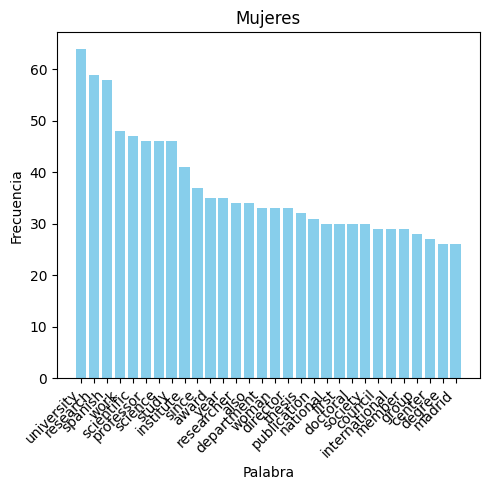

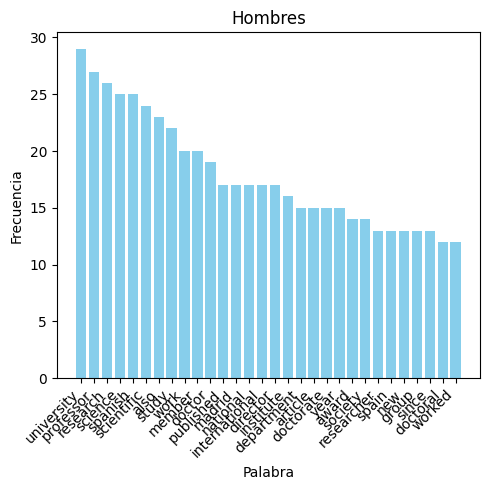

In [33]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')



#Creo que para lemmatization necesito pasar a inglés. Revisar eso.

# Función para traducir un texto muy largo
def traducir_texto_largo(texto):
    # Dividir el texto en fragmentos más pequeños para evitar errores
    fragmentos = [texto[i:i+5000] for i in range(0, len(texto), 5000)]
    texto_traducido = ""
    translator = Translator()
    for fragmento in fragmentos:
        traduccion = translator.translate(fragmento, src='es', dest='en')
        texto_traducido += traduccion.text
    return texto_traducido

# Leer el archivo CSV
df = pd.read_csv('/content/DatosTFG_columnas_hombre_mujer.csv')

# Traducir la columna 'texto_largo' y crear una nueva columna con la traducción
df['Biografía'] = df['Biografía'].apply(traducir_texto_largo)



#Pre-Procesado: poner en minuscula, quitar stop words (tanto español como inglés), crear mi propio vocabulario. Pre-entreno.

# Quita algunas cosillas del texto, entiendo. Clean data cleaning the text of punctuation and special characters. Quita cosas
# output_string = re.sub(pattern, repl, input_string)
def clean_data(text):
    text = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text)
    text = re.sub(r'[\\/×\^\]\[÷]', '', text)
    text = re.sub("\d", '', text)
    return text

#Poner en minúsula
def change_lower(text):
    text = text.lower()
    return text

#stopwords español
stopwords_list = stopwords.words("spanish")
def remover(text):
    text_tokens = text.split(" ")
    final_list = [word for word in text_tokens if not word in stopwords_list]
    text = ' '.join(final_list)
    return text

#stopwords inglés.
stopwords_list2 = stopwords.words("english")

def remover2(text):
    text_tokens = text.split(" ")
    final_list = [word for word in text_tokens if not word in stopwords_list2]
    text = ' '.join(final_list)
    return text


#stopwords inglés.
stopwords_list3 = stopwords.words("english")

def remover3(text):
    text_tokens = text.split(" ")
    final_list = [word for word in text_tokens if not word in stopwords_list3]
    text = ' '.join(final_list)
    return text


def get_w2vdf(df):
    w2v_df = pd.DataFrame(df['Biografía']).values.tolist()
    for i in range(len(w2v_df)):
        w2v_df[i] = w2v_df[i][0].split(" ")
    return w2v_df

#Se crea el vocabulario (palabras más similares, o sumer y restar vectores...)
def train_w2v(w2v_df):
    cores = multiprocessing.cpu_count()
    w2v_model = Word2Vec(min_count=4,
                         window=4,
                         alpha=0.03,
                         min_alpha=0.0007,
                         sg = 1,
                         workers=cores-1)

    w2v_model.build_vocab(w2v_df, progress_per=10000)
    w2v_model.train(w2v_df, total_examples=w2v_model.corpus_count, epochs=100, report_delay=1)
    return w2v_model


#Aplico a la biografía todas las cosas de pre-procesado.
before = type(df.Biografía[0])
#print(before)
df[['Biografía']] = df[['Biografía']].astype(str)
df['Biografía'] = df['Biografía'].apply(change_lower)
df['Biografía'] = df['Biografía'].apply(clean_data)
df['Biografía'] = df['Biografía'].apply(remover)
df['Biografía'] = df['Biografía'].apply(remover2)

#lo junto todo el un solo string.
text = ' '.join(df['Biografía'])

#lo entreno para tener mi propio vocabulario.
w2v_df = get_w2vdf(df)
w2v_model = train_w2v(w2v_df)



#Aquí entiendo que debo pasar a inglés porque no hace nada
# Descargar recursos necesarios para NLTK (solo es necesario la primera vez)
nltk.download('punkt')
nltk.download('wordnet')

def lemmatize_text(text):
    # Tokenizar el texto en palabras
    tokens = word_tokenize(text)

    # Inicializar lemmatizador de palabras
    lemmatizer = WordNetLemmatizer()

    # Lematizar cada palabra y agregarla a una lista
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Unir las palabras lematizadas en un string nuevamente
    lemmatized_text = ' '.join(lemmatized_tokens)

    return lemmatized_text

# Ejemplo de uso
texto_lemmatizado = lemmatize_text(text)
#print(texto_lemmatizado)

def eliminar_palabras_con_mismo_lema(text):

    lemmatized_text = lemmatize_text(text)

    # Convertir el texto lematizado en una lista de palabras
    palabras = lemmatized_text.split()

    # Eliminar palabras duplicadas
    palabras_sin_duplicados = list(set(palabras))

    # Unir las palabras sin duplicados en un string nuevamente
    texto_sin_duplicados = ' '.join(palabras_sin_duplicados)

    return texto_sin_duplicados

texto_sin_duplicados = eliminar_palabras_con_mismo_lema(text)
#print(texto_sin_duplicados)

df['Biografía'] = df['Biografía'].apply(lemmatize_text)
df['Biografía'] = df['Biografía'].apply(eliminar_palabras_con_mismo_lema)

text = ' '.join(df['Biografía'])

# Test the model
w2v_model.wv.most_similar(positive=["university"])


#Crear lista con palabras más frecuentes en las biografías.

def contar_frecuencia(text):
    # Dividir el texto en palabras
    palabras = text.split()

    # Crear un diccionario para almacenar la frecuencia de cada palabra
    frecuencia = {}

    # Iterar sobre cada palabra en el texto
    for palabra in palabras:
        # Si la palabra ya está en el diccionario, aumentar su frecuencia en 1
        if palabra in frecuencia:
            frecuencia[palabra] += 1
        # Si la palabra no está en el diccionario, inicializar su frecuencia en 1
        else:
            frecuencia[palabra] = 1

    return frecuencia


#Las ordeno por frecuencia.

def ordenar_por_frecuencia(text):
    # Obtener la frecuencia de cada palabra
    frecuencia_palabras = contar_frecuencia(text)

    # Ordenar las palabras por frecuencia (de mayor a menor)
    palabras_ordenadas = sorted(frecuencia_palabras, key=lambda palabra: frecuencia_palabras[palabra], reverse=True)

    return palabras_ordenadas

# Ejemplo de uso
frecuencia_palabras = contar_frecuencia(text)
palabras_ordenadas = ordenar_por_frecuencia(text)
print(palabras_ordenadas)
print(frecuencia_palabras)

#Dibujar histograma
def dibujar_histograma(text,titulo):
    # Obtener la frecuencia de cada palabra
    frecuencia_palabras = contar_frecuencia(text)

    # Ordenar las palabras por frecuencia (de mayor a menor)
    palabras_ordenadas = sorted(frecuencia_palabras, key=lambda palabra: frecuencia_palabras[palabra], reverse=True)

    # Tomar solo las primeras 30 palabras
    palabras_30 = palabras_ordenadas[:30]

    # Obtener las frecuencias y las palabras para el gráfico
    frecuencias = [frecuencia_palabras[palabra] for palabra in palabras_30]
    palabras = palabras_30

    # Crear el gráfico de barras
    plt.figure(figsize=(5, 5))
    plt.bar(palabras, frecuencias, color='skyblue')

    # Añadir etiquetas y título
    plt.xlabel('Palabra')
    plt.ylabel('Frecuencia')
    plt.title(titulo)

    # Rotar las etiquetas del eje x para que sean legibles
    plt.xticks(rotation=45, ha='right')

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()






#CASO HOMBRES, COPIAR Y PEGAR

#Para la lematización? hará falta traducir a inglés, pero no he conseguido hacerlo...

csv_path1 = '../content/DatosTFG_hombre.csv'


df1 = pd.read_csv(csv_path1)


#ya tengo las funciones puestas arriba, las uso

df1['Biografía'] = df1['Biografía'].apply(traducir_texto_largo)
df1[['Biografía']] = df1[['Biografía']].astype(str)
df1['Biografía'] = df1['Biografía'].apply(change_lower)
df1['Biografía'] = df1['Biografía'].apply(clean_data)
df1['Biografía'] = df1['Biografía'].apply(remover)
df1['Biografía'] = df1['Biografía'].apply(remover3)
df1['Biografía'] = df1['Biografía'].apply(lemmatize_text)
df1['Biografía'] = df1['Biografía'].apply(eliminar_palabras_con_mismo_lema)

w2v_df1 = get_w2vdf(df1)
w2v_model = train_w2v(w2v_df1)


text1 = ' '.join(df1['Biografía'])

print(text1)


#Hago el wordcloud nuevo :FALTA LEMMANTIZATION


def generar_wordcloud(text, titulo):
    wordcloud = WordCloud(max_words = 15,width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titulo)
    plt.axis('off')
    plt.show()



#El histograma

#1. Frecuencias

# Ejemplo de uso
palabras_ordenadas = ordenar_por_frecuencia(text1)
frecuencia_palabras = contar_frecuencia(text1)
print(palabras_ordenadas)
print(frecuencia_palabras)



#Quito las primeras 30 palabras que coinciden en el texto

def quitar_coincidencias(text, text1, cantidad_a_quitar=30):
    # Dividir los textos en palabras
    palabras_texto1 = text.split()
    palabras_texto2 = text1.split()

    # Contar frecuencia de palabras en cada texto
    frecuencias_texto1 = Counter(palabras_texto1)
    frecuencias_texto2 = Counter(palabras_texto2)

    # Obtener las palabras más frecuentes en cada texto
    palabras_frecuentes_texto1 = [palabra for palabra, frecuencia in frecuencias_texto1.most_common()]
    palabras_frecuentes_texto2 = [palabra for palabra, frecuencia in frecuencias_texto2.most_common()]

    # Encontrar las palabras comunes más frecuentes
    palabras_comunes = set(palabras_frecuentes_texto1[:cantidad_a_quitar]).intersection(palabras_frecuentes_texto2[:cantidad_a_quitar])

    # Eliminar las palabras comunes más frecuentes
    texto1_sin_coincidencias = ' '.join([palabra for palabra in palabras_texto1 if palabra not in palabras_comunes])
    texto2_sin_coincidencias = ' '.join([palabra for palabra in palabras_texto2 if palabra not in palabras_comunes])

    return texto1_sin_coincidencias, texto2_sin_coincidencias

# Ejemplo de uso

texto1_sin_coincidencias, texto2_sin_coincidencias = quitar_coincidencias(text, text1, cantidad_a_quitar=30)

print("Texto 1 sin las 30 palabras más comunes que aparecen en el Texto 2:")
print(texto1_sin_coincidencias)

print("\nTexto 2 sin las 30 palabras más comunes que aparecen en el Texto 1:")
print(texto2_sin_coincidencias)

# Ejemplo de uso
palabras_ordenadas = ordenar_por_frecuencia(text)
frecuencia_palabras = contar_frecuencia(text)
print(palabras_ordenadas)
print(frecuencia_palabras)


# Generar Word Cloud para el Texto 1
generar_wordcloud(texto1_sin_coincidencias, "Word Cloud de las biografías de las Mujeres")

# Generar Word Cloud para el Texto 2
generar_wordcloud(texto2_sin_coincidencias, "Word Cloud de las biografías de los Hombres")

# Generar Word Cloud para el Texto 1
generar_wordcloud(text, "Word Cloud de las biografías de las Mujeres con las coincidencias")

# Generar Word Cloud para el Texto 2
generar_wordcloud(text1, "Word Cloud de las biografías de los Hombres con las coincidencias")



#Dibujar histograma SIN las primeras 30 palabras coincidentes

titulo = "Mujeres"
titulo1 = "Hombres"
dibujar_histograma(texto1_sin_coincidencias,titulo)
dibujar_histograma(texto2_sin_coincidencias,titulo1)

#Dibujar histograma CON las primeras 30 palabras coincidentes

dibujar_histograma(text,titulo)
dibujar_histograma(text1,titulo1)
